In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\user\\Documents\\clean.csv")

In [3]:
df.head()

,id,Age,gender,height,weight,bp_high,bp_lo,cholesterol,gluc,diabetic,smoke,alco,active,cardio
0,0,50,2,168.0,62.0,110.0,80.0,1,1,1,0,0,1,0
1,1,55,1,156.0,85.0,140.0,90.0,3,1,3,0,0,1,1
2,2,52,1,165.0,64.0,130.0,70.0,3,1,3,0,0,0,1
3,3,48,2,169.0,82.0,150.0,100.0,1,1,1,0,0,1,1
4,4,48,1,156.0,56.0,100.0,60.0,1,1,1,0,0,0,0


In [4]:
df.isnull().sum()

id                0
Age               0
gender            0
height           25
weight            7
bp_high         229
bp_lo          1136
cholesterol       0
gluc              0
diabetic          0
smoke             0
alco              0
active            0
cardio            0
dtype: int64

In [5]:
df.shape

(70000, 14)

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()


id             0
Age            0
gender         0
height         0
weight         0
bp_high        0
bp_lo          0
cholesterol    0
gluc           0
diabetic       0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
# Summary statistics
df.describe()

,id,Age,gender,height,weight,bp_high,bp_lo,cholesterol,gluc,diabetic,smoke,alco,active,cardio
count,68626.000000,68626.000000,68626.00000,68626.000000,68626.000000,68626.000000,68626.000000,68626.000000,68626.000000,68626.000000,68626.00000,68626.000000,68626.000000,68626.000000
mean,49976.536910,53.325154,1.34860,164.392067,74.112918,126.599059,81.304797,1.364425,1.225672,1.348789,0.08794,0.053405,0.803311,0.494390
std,28847.334089,6.767890,0.47653,7.994126,14.300798,16.634389,9.355849,0.678723,0.571605,0.713802,0.28321,0.224842,0.397498,0.499972
min,0.000000,30.000000,1.00000,91.000000,30.000000,70.000000,50.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,24998.500000,48.000000,1.00000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
50%,50019.500000,54.000000,1.00000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
75%,74876.750000,58.000000,2.00000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.00000,207.000000,200.000000,240.000000,120.000000,3.000000,3.000000,3.000000,1.00000,1.000000,1.000000,1.000000


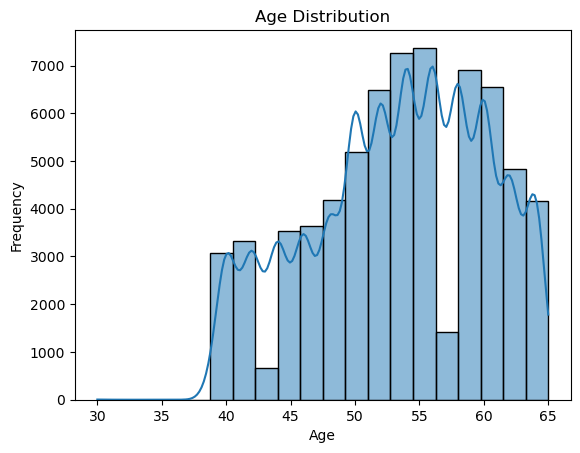

In [10]:
# Distribution visualization
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

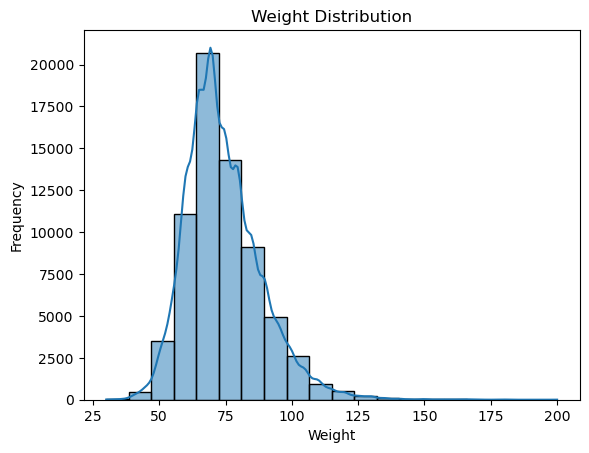

In [11]:
sns.histplot(df['weight'], bins=20, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Convert height from cm to meters (as BMI formula requires height in meters)
df['height_m'] = df['height'] / 100

# Calculate BMI
df['BMI'] = df['weight'] / (df['height_m'] ** 2)

# Print the updated dataframe with BMI column
df[['weight', 'height', 'BMI']]


,weight,height,BMI
0,62.0,168.0,21.967120
1,85.0,156.0,34.927679
2,64.0,165.0,23.507805
3,82.0,169.0,28.710479
4,56.0,156.0,23.011177
...,...,...,...
69995,76.0,168.0,26.927438
69996,126.0,158.0,50.472681
69997,105.0,183.0,31.353579
69998,72.0,163.0,27.099251


In [18]:
correlation_matrix = df[['weight', 'height', 'BMI']].corr()

In [19]:
correlation_matrix

,weight,height,BMI
weight,1.000000,0.300871,0.847168
height,0.300871,1.000000,-0.227873
BMI,0.847168,-0.227873,1.000000


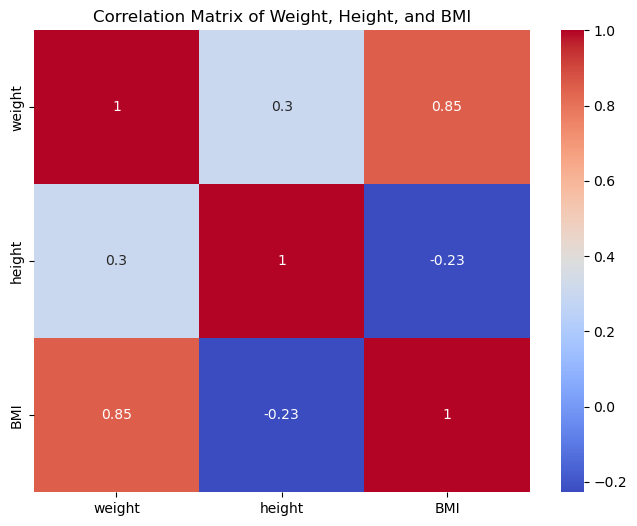

In [21]:
# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weight, Height, and BMI')
plt.show()

In [22]:
df.head()

,id,Age,gender,height,weight,bp_high,bp_lo,cholesterol,gluc,diabetic,smoke,alco,active,cardio,height_m,BMI
0,0,50,2,168.0,62.0,110.0,80.0,1,1,1,0,0,1,0,1.68,21.967120
1,1,55,1,156.0,85.0,140.0,90.0,3,1,3,0,0,1,1,1.56,34.927679
2,2,52,1,165.0,64.0,130.0,70.0,3,1,3,0,0,0,1,1.65,23.507805
3,3,48,2,169.0,82.0,150.0,100.0,1,1,1,0,0,1,1,1.69,28.710479
4,4,48,1,156.0,56.0,100.0,60.0,1,1,1,0,0,0,0,1.56,23.011177


In [23]:
df.to_csv('data_update.csv', index=False)